# Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Installation

In [2]:
!pip install scikit_optimize
!pip install lightgbm
!pip install catboost
!pip install optuna
!pip install statsmodels

use kaleido to show plotly as image

In [3]:
%%capture
!pip install kaleido
!pip install plotly>=4.0.0
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

# Imports

In [4]:
import numpy as np 
import pandas as pd 
import os
from os import listdir, getcwd, system
import datetime
from datetime import datetime as dt
from dateutil.relativedelta import *
import time
import timeit
from math import sqrt 
import gc
import json
from tqdm import tqdm
import logging
import sys
import pickle
import h5py # save the model

import joblib
# skopt.space.space

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# from jupyter_dash import JupyterDash
# import dash_core_components as dcc
# import dash_html_components as html
# from dash.dependencies import Input, Output
# from Dash_converter import checkpoint, experiment

# preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectFwe, f_regression, SelectKBest, SelectFdr, chi2, f_classif, mutual_info_classif, SelectFromModel
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler, Normalizer, QuantileTransformer, PowerTransformer, PolynomialFeatures
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# # text mining
# import nltk
# nltk.download('all-corpora', 'punkt', 'stopwords') # NLP - Download 'all-corpora' and 'punkt' from nltk
# from nltk.tokenize import sent_tokenize, word_tokenize, punkt
# from nltk.corpus import stopwords
# from nltk.stem.snowball import SnowballStemmer
# import re, string
# from sklearn.feature_extraction.text import TfidfVectorizer

# decomposition
from sklearn.decomposition import PCA

# Models
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection
from sklearn import linear_model
from sklearn import svm

from sklearn.preprocessing import StandardScaler  #minmaxscaler (image data - here not known) #maxscaler
from sklearn.linear_model import MultiTaskLasso, PassiveAggressiveClassifier, LogisticRegression, SGDClassifier, Perceptron, LinearRegression, OrthogonalMatchingPursuit, ARDRegression, TweedieRegressor, SGDRegressor, Perceptron, PassiveAggressiveRegressor, HuberRegressor
from sklearn.gaussian_process import GaussianProcessRegressor# https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy.html
from sklearn.svm import SVR, SVC
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.base import clone
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import multilabel_confusion_matrix, mean_squared_error, classification_report, explained_variance_score, r2_score, median_absolute_error, mean_absolute_error, mean_squared_error, make_scorer, accuracy_score, confusion_matrix, average_precision_score, f1_score, precision_score, recall_score 
# regression
from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error, mean_absolute_percentage_error, r2_score




from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor
from catboost import CatBoostRegressor

import lightgbm as lgb
import xgboost as xgb
import catboost as ctb


# deeplearning
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.applications import InceptionResNetV2, Xception, MobileNetV2, NASNetMobile, InceptionV3, EfficientNetV2S, EfficientNetV2M, EfficientNetV2L
from tensorflow import keras

from keras import optimizers
from keras.models import Model, Sequential, load_model
from keras.applications import vgg16



from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer, Input, GlobalAveragePooling2D, BatchNormalization
from keras.layers import LSTM
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima_model import ARIMA


# image
from PIL import Image
import PIL
import matplotlib.image as mpimgC
from PIL import Image
import PIL
from skimage.io import imread, imshow
from skimage import io
import cv2 as cv
import kaleido

# Hyperparameter tuning
# from functools import partial
# from skopt.searchcv import BayesSearchCV
# from skopt import space 
# from skopt.space import Integer, Real, Categorical 
# from skopt.utils import use_named_args
# from skopt import gp_minimize
# import autosklearn.regression
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK, STATUS_FAIL

import optuna
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice


#dropdown
import ipywidgets as widgets
import IPython
from IPython.display import Image
from IPython.core.display import display, HTML
from ipywidgets import interact, interactive, fixed, interact_manual



# To see multiple outputs from a cell
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', 20) 

# Setup
import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (20,5)



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
def save_obj(obj, path, name):
    with open(path +"/"+name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(path, name):
    with open(path +"/"+ name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [6]:
def showPlotlyAsImage(fig, width=1200, height=300):
  img_bytes = fig.to_image(format="png", width=width, height=height, scale=2)
  display(Image(img_bytes))

In [7]:
gc.collect()
tf.keras.backend.clear_session()

In [8]:
seed=42
tf.random.set_seed(seed)
np.random.seed(seed)

In [9]:
os.listdir()

['.config', '=4.0.0', 'drive', 'sample_data']

## check runtime (gpu)

In [10]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu May 19 10:38:42 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [11]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [12]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [13]:
# tf.test.is_gpu_available()

In [14]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16602533470864589762
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14436532224
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3511937971611899283
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


### Variables


In [15]:
# #@title String fields (change this to train the model with all the data and to save it)

# PExperimentName = 'MobileNetV2_v1_submission' #@param {type:"string"}
# PFULL_RUN = False #@param ["False", "True"] {type:"raw"}
# PSAVE_Model = False #@param ["False", "True"] {type:"raw"}

In [16]:
folder_OR2 = 'drive/MyDrive/Industrial_Applications_of_AI/Secondary_Sector/Online_Retail_II'
folder_OR2_data = 'drive/MyDrive/Industrial_Applications_of_AI/Secondary_Sector/Online_Retail_II/data'
folder_OR2_models = 'drive/MyDrive/Industrial_Applications_of_AI/Secondary_Sector/Online_Retail_II/models'

In [17]:
def returnLatestFolder(afoldername, aprefix):
  optuna_runs = os.listdir(afoldername)
  optuna_runs_times = []

  latest_folder_time = None
  latest_folder_time_str = None 
  for sub_folder in optuna_runs:
    time_str_of_folder = sub_folder.split(aprefix)[1]
    datetime_of_folder = dt.strptime(time_str_of_folder,"%m_%d_%Y__%H_%M_%S")

    if latest_folder_time == None:
      latest_folder_time = latest_folder_time
      latest_folder_time_str = time_str_of_folder
    elif latest_folder_time < datetime_of_folder:
      latest_folder_time = latest_folder_time
      latest_folder_time_str = time_str_of_folder

  return os.path.join(afoldername, aprefix+latest_folder_time_str)


In [18]:
# - scaler   = the scaler object (it needs an inverse_transform method)
# - data     = the data to be inverse transformed as a Series, ndarray, ... 
#              (a 1d object you can assign to a df column)
# - ftName   = the name of the column to which the data belongs
# - colNames = all column names of the data on which scaler was fit 
#              (necessary because scaler will only accept a df of the same shape as the one it was fit on)
def invTransform(scaler, data, colName, colNames):
    dummy = pd.DataFrame(np.zeros((len(data), len(colNames))), columns=colNames)
    dummy[colName] = data
    dummy = pd.DataFrame(scaler.inverse_transform(dummy), columns=colNames)
    return dummy[colName].values

# Load the data

In [19]:
df_train = pd.read_csv(os.path.join(folder_OR2_data,'df_train.csv'))
df_train = df_train.drop(['Unnamed: 0'], axis = 1)
display(df_train)
df_test= pd.read_csv(os.path.join(folder_OR2_data,'df_test.csv'))
df_test = df_test.drop(['Unnamed: 0'], axis = 1)
df_test

,InvoiceDate,Sum_OrderQuantity,Sum_ReturnBoolean,Sum_CustomerAmount,Sum_Country_Australia,Sum_Country_Austria,Sum_Country_Bahrain,Sum_Country_Belgium,Sum_Country_Brazil,Sum_Country_Canada,...,lag12_Sum_OrderQuantity,lag12_Sum_ReturnBoolean,lag12_Sum_CustomerAmount,lag13_Sum_OrderQuantity,lag13_Sum_ReturnBoolean,lag13_Sum_CustomerAmount,lag14_Sum_OrderQuantity,lag14_Sum_ReturnBoolean,lag14_Sum_CustomerAmount,target_OrderQuantity
0,2009-12-02 12:00:00,6859,6,864,0.0,0.0,0.0,0.0,0.0,0.0,...,9586.0,41.0,994.0,5756.0,35.0,560.0,2177.0,0.0,134.0,3323.0
1,2009-12-02 14:00:00,3323,2,553,0.0,0.0,0.0,0.0,0.0,0.0,...,2656.0,28.0,326.0,9586.0,41.0,994.0,5756.0,35.0,560.0,6062.0
2,2009-12-02 16:00:00,6062,0,185,0.0,0.0,0.0,0.0,0.0,0.0,...,2609.0,6.0,227.0,2656.0,28.0,326.0,9586.0,41.0,994.0,0.0
3,2009-12-02 18:00:00,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,797.0,0.0,54.0,2609.0,6.0,227.0,2656.0,28.0,326.0,0.0
4,2009-12-02 20:00:00,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,797.0,0.0,54.0,2609.0,6.0,227.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4014,2010-11-02 00:00:00,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4015,2010-11-02 02:00:00,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4016,2010-11-02 04:00:00,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4017,2010-11-02 06:00:00,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1048.0


,InvoiceDate,Sum_OrderQuantity,Sum_ReturnBoolean,Sum_CustomerAmount,Sum_Country_Australia,Sum_Country_Austria,Sum_Country_Bahrain,Sum_Country_Belgium,Sum_Country_Brazil,Sum_Country_Canada,...,lag12_Sum_OrderQuantity,lag12_Sum_ReturnBoolean,lag12_Sum_CustomerAmount,lag13_Sum_OrderQuantity,lag13_Sum_ReturnBoolean,lag13_Sum_CustomerAmount,lag14_Sum_OrderQuantity,lag14_Sum_ReturnBoolean,lag14_Sum_CustomerAmount,target_OrderQuantity
0,2010-11-03 18:00:00,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1022.0,2.0,71.0,7061.0,2.0,354.0,2615.0,3.0,359.0,0.0
1,2010-11-03 20:00:00,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1022.0,2.0,71.0,7061.0,2.0,354.0,0.0
2,2010-11-03 22:00:00,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1022.0,2.0,71.0,0.0
3,2010-11-04 00:00:00,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2010-11-04 02:00:00,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,2010-12-09 10:00:00,6533,5,306,0.0,0.0,0.0,0.0,0.0,0.0,...,4099.0,8.0,335.0,1466.0,1.0,99.0,0.0,0.0,0.0,4326.0
429,2010-12-09 12:00:00,4326,21,568,0.0,0.0,0.0,0.0,0.0,0.0,...,6963.0,23.0,925.0,4099.0,8.0,335.0,1466.0,1.0,99.0,3510.0
430,2010-12-09 14:00:00,3510,46,513,0.0,0.0,0.0,0.0,0.0,0.0,...,6126.0,19.0,441.0,6963.0,23.0,925.0,4099.0,8.0,335.0,974.0
431,2010-12-09 16:00:00,974,1,183,0.0,0.0,0.0,0.0,0.0,0.0,...,2621.0,22.0,221.0,6126.0,19.0,441.0,6963.0,23.0,925.0,506.0


# Check for Nan values

https://datatofish.com/check-nan-pandas-dataframe/

In [20]:
df_train.isnull().values.any()

False

In [21]:
# for column in df_train.columns:
#   print("Column: ", column, "Nan: ", df_train[str(column)].isnull().sum(), "/", len(df_train) )

In [22]:
df_test.isnull().values.any()

False

# Prepare the dataset into X_train, y_train, X_test and y_test

In [23]:
# extract X and y
X_train = df_train.drop(['target_OrderQuantity', 'InvoiceDate'], axis=1)
y_train = df_train['target_OrderQuantity']

In [24]:
# Create X_ train with date (for time based cross validation)
X_train_with_Date = df_train.drop(['target_OrderQuantity'], axis=1)
X_train_with_Date['InvoiceDate'] = pd.to_datetime(X_train_with_Date['InvoiceDate'])

In [25]:
# extract X and y
X_test = df_test.drop(['target_OrderQuantity', 'InvoiceDate'], axis=1)
y_test = df_test['target_OrderQuantity']

In [26]:
# Create X_ test with date
X_test_with_Date = df_test.drop(['target_OrderQuantity'], axis=1)
X_test_with_Date['InvoiceDate'] = pd.to_datetime(X_test_with_Date['InvoiceDate'])

## univariate

In [27]:
X_train_univariate_with_Date = X_train_with_Date[[ 
'InvoiceDate',
'Sum_OrderQuantity',
'lag1_Sum_OrderQuantity',
'lag2_Sum_OrderQuantity',
'lag3_Sum_OrderQuantity',
'lag4_Sum_OrderQuantity',
'lag5_Sum_OrderQuantity',
'lag6_Sum_OrderQuantity',
'lag7_Sum_OrderQuantity',
'lag8_Sum_OrderQuantity',
'lag9_Sum_OrderQuantity',
'lag10_Sum_OrderQuantity',
'lag11_Sum_OrderQuantity',
'lag12_Sum_OrderQuantity',
'lag13_Sum_OrderQuantity',
'lag14_Sum_OrderQuantity',                  
]]

In [28]:
X_test_univariate_with_Date = X_test_with_Date[[ 
'InvoiceDate',  
'Sum_OrderQuantity',                                     
'lag1_Sum_OrderQuantity',
'lag2_Sum_OrderQuantity',
'lag3_Sum_OrderQuantity',
'lag4_Sum_OrderQuantity',
'lag5_Sum_OrderQuantity',
'lag6_Sum_OrderQuantity',
'lag7_Sum_OrderQuantity',
'lag8_Sum_OrderQuantity',
'lag9_Sum_OrderQuantity',
'lag10_Sum_OrderQuantity',
'lag11_Sum_OrderQuantity',
'lag12_Sum_OrderQuantity',
'lag13_Sum_OrderQuantity',
'lag14_Sum_OrderQuantity',                  
]]

In [29]:
X_train_univariate = X_train_univariate_with_Date.drop(['InvoiceDate'], axis=1)
X_test_univariate = X_test_univariate_with_Date.drop(['InvoiceDate'], axis=1)

# Scores

In [30]:
def c_mean_absolute_error(y_true, y_pred):
  return mean_absolute_error(y_true, y_pred)

def c_mean_absolute_percentage_error(y_true, y_pred): #MAPE
  return mean_absolute_percentage_error(y_true, y_pred)

def c_rmse(y_true, y_pred):
  return sqrt(mean_absolute_error(y_true, y_pred))

def c_r2_score(y_true, y_pred):
  return r2_score(y_true, y_pred)

def c_max_error(y_true, y_pred):
  return max_error(y_true, y_pred)

def c_explained_variance_score(y_true, y_pred):
  return explained_variance_score(y_true, y_pred)

In [31]:
def returnScoreSummary(y_true, y_pred):
  print('RMSE Score\t', c_rmse(y_true, y_pred))
  print('MAE Score\t', c_mean_absolute_error(y_true, y_pred))
  print('MAPE Score\t', c_mean_absolute_percentage_error(y_true, y_pred))
  print('R2 Score\t', c_r2_score(y_true, y_pred))
  print('MAXErr Score\t', c_max_error(y_true, y_pred))
  print('EV Score\t', c_explained_variance_score(y_true, y_pred))


In [32]:
def plotTest_and_predicted(y_pred, model_name):
  fig = go.Figure()
  fig.add_trace(go.Scatter(x=X_test_univariate_with_Date['InvoiceDate'], y=y_test,
                      mode='lines',
                      name='Y_Test_Actual'))

  fig.add_trace(go.Scatter(x=X_test_univariate_with_Date['InvoiceDate'], y=y_pred,
                      mode='lines',
                      name='Y_test_Prediction <br>{}'.format(model_name)))

  fig.show()


In [33]:
def plotTest_and_predicted_generalized(y_actual, y_pred, time_interval,model_name):
  fig = go.Figure()
  fig.add_trace(go.Scatter(x=time_interval, y=y_actual,
                      mode='lines',
                      name='Y_Test_Actual'))

  fig.add_trace(go.Scatter(x=time_interval, y=y_pred,
                      mode='lines',
                      name='Y_test_Prediction <br>{}'.format(model_name)))
  fig.update_layout(
    height=400,
  )

  showPlotlyAsImage(fig)


# Univariate Models

In [34]:
X_train_univariate_with_Date

,InvoiceDate,Sum_OrderQuantity,lag1_Sum_OrderQuantity,lag2_Sum_OrderQuantity,lag3_Sum_OrderQuantity,lag4_Sum_OrderQuantity,lag5_Sum_OrderQuantity,lag6_Sum_OrderQuantity,lag7_Sum_OrderQuantity,lag8_Sum_OrderQuantity,lag9_Sum_OrderQuantity,lag10_Sum_OrderQuantity,lag11_Sum_OrderQuantity,lag12_Sum_OrderQuantity,lag13_Sum_OrderQuantity,lag14_Sum_OrderQuantity
0,2009-12-02 12:00:00,6859,8508.0,4814.0,0.0,0.0,0.0,0.0,0.0,0.0,797.0,2609.0,2656.0,9586.0,5756.0,2177.0
1,2009-12-02 14:00:00,3323,6859.0,8508.0,4814.0,0.0,0.0,0.0,0.0,0.0,0.0,797.0,2609.0,2656.0,9586.0,5756.0
2,2009-12-02 16:00:00,6062,3323.0,6859.0,8508.0,4814.0,0.0,0.0,0.0,0.0,0.0,0.0,797.0,2609.0,2656.0,9586.0
3,2009-12-02 18:00:00,0,6062.0,3323.0,6859.0,8508.0,4814.0,0.0,0.0,0.0,0.0,0.0,0.0,797.0,2609.0,2656.0
4,2009-12-02 20:00:00,0,0.0,6062.0,3323.0,6859.0,8508.0,4814.0,0.0,0.0,0.0,0.0,0.0,0.0,797.0,2609.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4014,2010-11-02 00:00:00,0,0.0,0.0,0.0,1879.0,1171.0,4389.0,3740.0,639.0,0.0,0.0,0.0,0.0,0.0,0.0
4015,2010-11-02 02:00:00,0,0.0,0.0,0.0,0.0,1879.0,1171.0,4389.0,3740.0,639.0,0.0,0.0,0.0,0.0,0.0
4016,2010-11-02 04:00:00,0,0.0,0.0,0.0,0.0,0.0,1879.0,1171.0,4389.0,3740.0,639.0,0.0,0.0,0.0,0.0
4017,2010-11-02 06:00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,1879.0,1171.0,4389.0,3740.0,639.0,0.0,0.0,0.0


## SNaive

In [35]:
def modelSNaive(row): # return value 24 hours ago
  return row['lag10_Sum_OrderQuantity'] # lag 11 is actual lag 12 because Sum_OrderQuantity is already lag 1

In [36]:
Y_test_pred_snaive = modelSNaive(X_test_univariate_with_Date)

In [37]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=X_test_univariate_with_Date['InvoiceDate'], y=y_test,
                    mode='lines',
                    name='Y_Test_Actual'))

fig.add_trace(go.Scatter(x=X_test_univariate_with_Date['InvoiceDate'], y=Y_test_pred_snaive,
                    mode='lines',
                    name='Y_test_Prediction <br>SNaive'))

fig.show()

In [38]:
plotTest_and_predicted(Y_test_pred_snaive, "SNaive")

In [39]:
# scores

In [40]:
print('RMSE Score\t', c_rmse(y_test,Y_test_pred_snaive))
print('MAE Score\t', c_mean_absolute_error(y_test,Y_test_pred_snaive))
print('MAPE Score\t', c_mean_absolute_percentage_error(y_test,Y_test_pred_snaive))
print('R2 Score\t', c_r2_score(y_test,Y_test_pred_snaive))
print('MAXErr Score\t', c_max_error(y_test,Y_test_pred_snaive))
print('EV Score\t', c_explained_variance_score(y_test,Y_test_pred_snaive))

RMSE Score	 40.03733823140456
MAE Score	 1602.9884526558892
MAPE Score	 1.305315827332557e+18
R2 Score	 -0.10114823854145416
MAXErr Score	 27391.0
EV Score	 -0.10113035971817808


In [41]:
returnScoreSummary(y_test,Y_test_pred_snaive)

RMSE Score	 40.03733823140456
MAE Score	 1602.9884526558892
MAPE Score	 1.305315827332557e+18
R2 Score	 -0.10114823854145416
MAXErr Score	 27391.0
EV Score	 -0.10113035971817808


## SMA

## SMA Window = 2 days

In [42]:
def modelSimple_MovingAverage(row): # 
  average = np.average(row)
  return average # lag 11 is actual lag 12 because Sum_OrderQuantity is already lag 1

In [43]:
Y_test_pred_sma = []
for i, row in X_test_univariate.iterrows():
  Y_test_pred_sma.append(modelSimple_MovingAverage(row))

In [44]:
plotTest_and_predicted(Y_test_pred_sma, "SMA")
returnScoreSummary(y_test,Y_test_pred_sma)

RMSE Score	 45.13636169471551
MAE Score	 2037.2911470361817
MAPE Score	 4.0785125205562173e+18
R2 Score	 0.03637077016973622
MAXErr Score	 29209.066666666666
EV Score	 0.03639624521230944


## SMA Window = 1 days

In [45]:
def modelSimple_MovingAverage(row): # 
  average = np.average(row[:12])
  return average # lag 11 is actual lag 12 because Sum_OrderQuantity is already lag 1

Y_test_pred_sma_1 = []
for i, row in X_test_univariate.iterrows():
  Y_test_pred_sma_1.append(modelSimple_MovingAverage(row))

plotTest_and_predicted(Y_test_pred_sma_1, "SMA 1_day")
returnScoreSummary(y_test,Y_test_pred_sma_1)

RMSE Score	 45.91335096425378
MAE Score	 2108.0357967667437
MAPE Score	 4.3426271434607816e+18
R2 Score	 -0.008365217801095115
MAXErr Score	 28899.25
EV Score	 -0.008347802130520554


## SMA Window = 0.25 days

In [46]:
def modelSimple_MovingAverage(row): # 
  average = np.average(row[:3])
  return average # lag 11 is actual lag 12 because Sum_OrderQuantity is already lag 1

Y_test_pred_sma_025 = []
for i, row in X_test_univariate.iterrows():
  Y_test_pred_sma_025.append(modelSimple_MovingAverage(row))

plotTest_and_predicted(Y_test_pred_sma_025, "SMA 6_hours")
returnScoreSummary(y_test,Y_test_pred_sma_025)

RMSE Score	 43.42255279044643
MAE Score	 1885.5180908391071
MAPE Score	 2.34893056592575e+18
R2 Score	 -0.13134440138384784
MAXErr Score	 30054.666666666668
EV Score	 -0.1313435001350527


## SMA Window = last 2 hours

In [47]:
def modelSimple_MovingAverage(row): # 
  average = np.average(row[:1])
  return average # lag 11 is actual lag 12 because Sum_OrderQuantity is already lag 1

Y_test_pred_sma_last2 = []
for i, row in X_test_univariate.iterrows():
  Y_test_pred_sma_last2.append(modelSimple_MovingAverage(row))

plotTest_and_predicted(Y_test_pred_sma_last2, "SMA last 2_hours")
returnScoreSummary(y_test,Y_test_pred_sma_last2)

RMSE Score	 36.29211736603323
MAE Score	 1317.1177829099306
MAPE Score	 6.100453324345536e+17
R2 Score	 0.12217031840544834
MAXErr Score	 28416.0
EV Score	 0.1221703397706535


# ARIMA

https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

In [48]:
model_arima = ARIMA(y_train, order=(5,1,0))
model_arima_fit = model_arima.fit()

In [49]:
# summary of fit model
print(model_arima_fit.summary())

                               ARIMA Model Results                                
Dep. Variable:     D.target_OrderQuantity   No. Observations:                 4018
Model:                     ARIMA(5, 1, 0)   Log Likelihood              -39279.318
Method:                           css-mle   S.D. of innovations           4259.116
Date:                    Thu, 19 May 2022   AIC                          78572.636
Time:                            10:38:45   BIC                          78616.725
Sample:                                 1   HQIC                         78588.261
                                                                                  
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.2193     23.620     -0.009      0.993     -46.514      46.076
ar.L1.D.target_OrderQuantity    -0.6623      

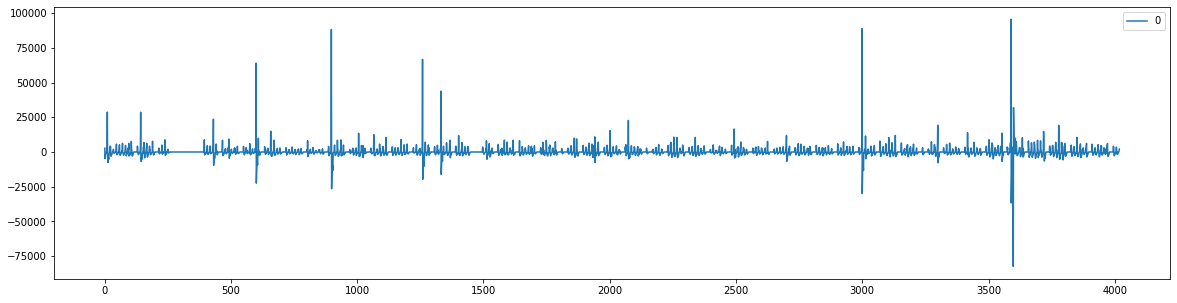

In [50]:
# line plot of residuals
residuals = pd.DataFrame(model_arima_fit.resid)
residuals.plot()
plt.show()

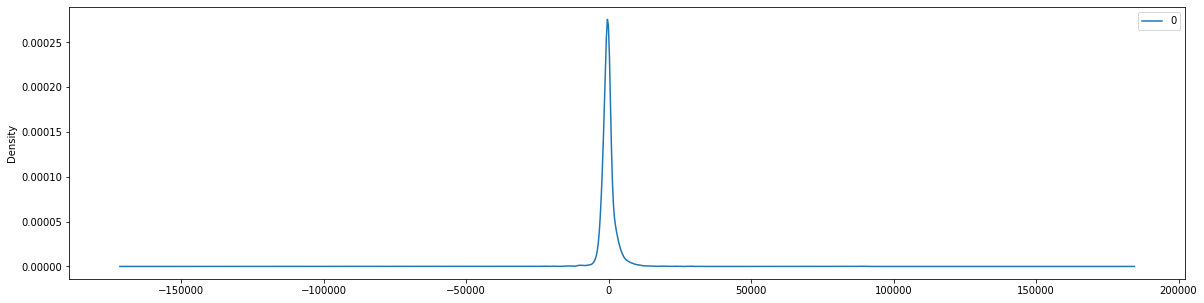

In [51]:
# density plot of residuals
residuals.plot(kind='kde')
plt.show()

In [52]:
# summary stats of residuals
print(residuals.describe())

                  0
count   4018.000000
mean      -1.016458
std     4259.829386
min   -82444.227530
25%    -1135.194374
50%      -37.192086
75%        0.623953
max    95549.488037


In [53]:
#@title Train_Arima
Boolean_Train_Arima = False #@param ["False", "True"] {type:"raw"}

In [54]:
if Boolean_Train_Arima:
  history = [x for x in y_train]
  test_pred_ARIMA = list()

  # walk-forward validation
  for t in tqdm(range(len(y_test))):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    test_pred_ARIMA.append(yhat)
    obs = y_test[t]
    history.append(obs)
    # print('predicted=%f, expected=%f' % (yhat, obs))

In [55]:
if Boolean_Train_Arima:
  plotTest_and_predicted(Y_test_pred_sma_last2, "ARIMA(5,1,0)")
  # evaluate forecasts
  returnScoreSummary(y_test,test_pred_ARIMA)

# Multivariate Models (tune with cross validation)

## Time series cross validation (Blocking Time Series)

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html#sklearn.model_selection.TimeSeriesSplit

https://towardsdatascience.com/time-based-cross-validation-d259b13d42b8

https://goldinlocks.github.io/Time-Series-Cross-Validation/#:~:text=Blocked%20cross%2Dvalidation%20works%20by,and%20another%20as%20a%20response.

In [56]:
class TimeBasedCV(object):
    '''
    Parameters 
    ----------
    train_period: int
        number of time units to include in each train set
        default is 30
    test_period: int
        number of time units to include in each test set
        default is 7
    freq: string
        frequency of input parameters. possible values are: days, months, years, weeks, hours, minutes, seconds
        possible values designed to be used by dateutil.relativedelta class
        deafault is days
    '''
    
    
    def __init__(self, train_period=30, test_period=7, freq='days'):
        self.train_period = train_period
        self.test_period = test_period
        self.freq = freq

        
        
    def split(self, data, validation_split_date=None, date_column='InvoiceDate', gap=0, verbose = 1):
        '''
        Generate indices to split data into training and test set
        
        Parameters 
        ----------
        data: pandas DataFrame
            your data, contain one column for the record date 
        validation_split_date: datetime.date()
            first date to perform the splitting on.
            if not provided will set to be the minimum date in the data after the first training set
        date_column: string, deafult='record_date'
            date of each record
        gap: int, default=0
            for cases the test set does not come right after the train set,
            *gap* days are left between train and test sets
        
        Returns 
        -------
        train_index ,test_index: 
            list of tuples (train index, test index) similar to sklearn model selection
        '''
        
        # check that date_column exist in the data:
        try:
            data[date_column]
        except:
            raise KeyError(date_column)
                    
        train_indices_list = []
        test_indices_list = []
        cv_num_list = []

        if validation_split_date==None:
            validation_split_date = data[date_column].min().date() + eval('relativedelta('+self.freq+'=self.train_period)')
        
        start_train = validation_split_date - eval('relativedelta('+self.freq+'=self.train_period)')
        end_train = start_train + eval('relativedelta('+self.freq+'=self.train_period)')
        start_test = end_train + eval('relativedelta('+self.freq+'=gap)')
        end_test = start_test + eval('relativedelta('+self.freq+'=self.test_period)')

        index = 0
        while end_test < data[date_column].max().date():
            index = index + 1
            # train indices:
            cur_train_indices = list(data[(data[date_column].dt.date>=start_train) & 
                                     (data[date_column].dt.date<end_train)].index)

            # test indices:
            cur_test_indices = list(data[(data[date_column].dt.date>=start_test) &
                                    (data[date_column].dt.date<end_test)].index)
            
            if verbose > 0:
              print("Train period:",start_train,"-" , end_train, ", Test period", start_test, "-", end_test,
                    "# train records", len(cur_train_indices), ", # test records", len(cur_test_indices))

            train_indices_list.append(cur_train_indices)
            test_indices_list.append(cur_test_indices)

            # update dates:
            start_train = start_train + eval('relativedelta('+self.freq+'=self.test_period)')
            end_train = start_train + eval('relativedelta('+self.freq+'=self.train_period)')
            start_test = end_train + eval('relativedelta('+self.freq+'=gap)')
            end_test = start_test + eval('relativedelta('+self.freq+'=self.test_period)')

            cv_num_list.append(index)

        # display(test_indices_list)
        # mimic sklearn output  
        index_output = [(train,test, ) for train,test in zip(train_indices_list,test_indices_list)]

        self.n_splits = len(index_output)
        
        return index_output
    
    
    def get_n_splits(self):
        """Returns the number of splitting iterations in the cross-validator
        Returns
        -------
        n_splits : int
            Returns the number of splitting iterations in the cross-validator.
        """
        return self.n_splits 

In [57]:
# for i, (train_index, test_index) in enumerate(tscv.split(X_train_with_Date, date_column='InvoiceDate', verbose = 0)):
#   print(i)
#   print(train_index)

### Visualize TimeBased Cross Validation (cv=11)

In [58]:
min_time = min(X_train_with_Date['InvoiceDate'])

In [59]:
max_time_train = max(X_train_with_Date['InvoiceDate'])

In [60]:
max_time = max(X_test_with_Date['InvoiceDate'])

In [61]:
# TimeBasedCV
# 11 cv fold
tscv = TimeBasedCV(train_period=147,
                   test_period=17,
                   freq='days')

for train_index, test_index in tscv.split(X_train_with_Date, date_column='InvoiceDate'):
    print("\nTrainIds: ", train_index)
    print(test_index)

    X_train_cv   = X_train_with_Date.loc[train_index]
    y_train_cv = y_train.loc[train_index]

    X_valid_cv    = X_train_with_Date.loc[test_index]
    y_valid_cv  = y_train.loc[test_index]

    fig = go.Figure()
    fig.update_layout(xaxis_range=[min_time,max_time])
    fig.add_trace(go.Scatter(x=X_train_cv['InvoiceDate'], y=y_train_cv,
                        mode='lines',
                        name='Train'))
    fig.add_trace(go.Scatter(x=X_valid_cv['InvoiceDate'], y=y_valid_cv,
                        mode='lines',
                        name='Validation'))
    
    fig.add_trace(go.Scatter(x=df_test['InvoiceDate'], y=y_test,
                        mode='lines',
                        name='Test'))
    
    fig.show()


    # X_train_cv = X_train_cv.drop('InvoiceDate', axis=1)
    # y_valid_cv = X_valid_cv.drop('InvoiceDate', axis=1)

    # # simplification
    # X_train_cv = X_train_cv[['Sum_OrderQuantity','InvoiceDate_weekday_Num', 'Sum_CustomerAmount']]
    # X_valid_cv = X_valid_cv[['Sum_OrderQuantity','InvoiceDate_weekday_Num', 'Sum_CustomerAmount']]




# get number of splits
# 11 cv fold
tscv.get_n_splits()


Train period: 2009-12-02 - 2010-04-28 , Test period 2010-04-28 - 2010-05-15 # train records 1758 , # test records 204
Train period: 2009-12-19 - 2010-05-15 , Test period 2010-05-15 - 2010-06-01 # train records 1764 , # test records 204
Train period: 2010-01-05 - 2010-06-01 , Test period 2010-06-01 - 2010-06-18 # train records 1764 , # test records 204
Train period: 2010-01-22 - 2010-06-18 , Test period 2010-06-18 - 2010-07-05 # train records 1764 , # test records 204
Train period: 2010-02-08 - 2010-07-05 , Test period 2010-07-05 - 2010-07-22 # train records 1764 , # test records 204
Train period: 2010-02-25 - 2010-07-22 , Test period 2010-07-22 - 2010-08-08 # train records 1764 , # test records 204
Train period: 2010-03-14 - 2010-08-08 , Test period 2010-08-08 - 2010-08-25 # train records 1764 , # test records 204
Train period: 2010-03-31 - 2010-08-25 , Test period 2010-08-25 - 2010-09-11 # train records 1764 , # test records 204
Train period: 2010-04-17 - 2010-09-11 , Test period 2010


TrainIds:  [198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 39


TrainIds:  [402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 59


TrainIds:  [606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 80


TrainIds:  [810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1


TrainIds:  [1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 117


TrainIds:  [1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381, 138


TrainIds:  [1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437, 1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 158


TrainIds:  [1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 1730, 1731, 1732, 1733, 1734, 1735, 1736, 1737, 1738, 1739, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 179


TrainIds:  [1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 199


TrainIds:  [2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100, 2101, 2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109, 2110, 2111, 2112, 2113, 2114, 2115, 2116, 2117, 2118, 2119, 2120, 2121, 2122, 2123, 2124, 2125, 2126, 2127, 2128, 2129, 2130, 2131, 2132, 2133, 2134, 2135, 2136, 2137, 2138, 2139, 2140, 2141, 2142, 2143, 2144, 2145, 2146, 2147, 2148, 2149, 2150, 2151, 2152, 2153, 2154, 2155, 2156, 2157, 2158, 2159, 2160, 2161, 2162, 2163, 2164, 2165, 2166, 2167, 2168, 2169, 2170, 2171, 2172, 2173, 2174, 2175, 2176, 2177, 2178, 2179, 2180, 2181, 2182, 2183, 2184, 2185, 2186, 2187, 2188, 2189, 2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 219

11

In [62]:
# TimeBasedCV
# 2 cv fold

tscv = TimeBasedCV(train_period=270,
                   test_period=30,
                   freq='days')

for train_index, test_index in tscv.split(X_train_with_Date, date_column='InvoiceDate'):
    print("\nTrainIds: ", train_index)
    print(test_index)

    X_train_cv   = X_train_with_Date.loc[train_index]
    y_train_cv = y_train.loc[train_index]

    X_valid_cv    = X_train_with_Date.loc[test_index]
    y_valid_cv  = y_train.loc[test_index]

    fig = go.Figure()
    fig.update_layout(xaxis_range=[min_time,max_time])
    fig.add_trace(go.Scatter(x=X_train_cv['InvoiceDate'], y=y_train_cv,
                        mode='lines',
                        name='Train'))
    fig.add_trace(go.Scatter(x=X_valid_cv['InvoiceDate'], y=y_valid_cv,
                        mode='lines',
                        name='Validation'))
    
    fig.add_trace(go.Scatter(x=df_test['InvoiceDate'], y=y_test,
                        mode='lines',
                        name='Test'))
    
    fig.show()



tscv.get_n_splits()

Train period: 2009-12-02 - 2010-08-29 , Test period 2010-08-29 - 2010-09-28 # train records 3234 , # test records 360
Train period: 2010-01-01 - 2010-09-28 , Test period 2010-09-28 - 2010-10-28 # train records 3240 , # test records 360

TrainIds:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 1


TrainIds:  [354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 55

2

In [63]:
# TimeBasedCV
# 4 cv fold

tscv = TimeBasedCV(train_period=225,
                   test_period=25,
                   freq='days')

for train_index, test_index in tscv.split(X_train_with_Date, date_column='InvoiceDate'):
    print("\nTrainIds: ", train_index)
    print(test_index)

    X_train_cv   = X_train_with_Date.loc[train_index]
    y_train_cv = y_train.loc[train_index]

    X_valid_cv    = X_train_with_Date.loc[test_index]
    y_valid_cv  = y_train.loc[test_index]

    fig = go.Figure()
    fig.update_layout(xaxis_range=[min_time,max_time])
    fig.add_trace(go.Scatter(x=X_train_cv['InvoiceDate'], y=y_train_cv,
                        mode='lines',
                        name='Train'))
    fig.add_trace(go.Scatter(x=X_valid_cv['InvoiceDate'], y=y_valid_cv,
                        mode='lines',
                        name='Validation'))
    
    fig.add_trace(go.Scatter(x=df_test['InvoiceDate'], y=y_test,
                        mode='lines',
                        name='Test'))
    
    fig.show()



tscv.get_n_splits()

Train period: 2009-12-02 - 2010-07-15 , Test period 2010-07-15 - 2010-08-09 # train records 2694 , # test records 300
Train period: 2009-12-27 - 2010-08-09 , Test period 2010-08-09 - 2010-09-03 # train records 2700 , # test records 300
Train period: 2010-01-21 - 2010-09-03 , Test period 2010-09-03 - 2010-09-28 # train records 2700 , # test records 300
Train period: 2010-02-15 - 2010-09-28 , Test period 2010-09-28 - 2010-10-23 # train records 2700 , # test records 300

TrainIds:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 


TrainIds:  [294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 49


TrainIds:  [594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 79


TrainIds:  [894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1

4

## Prepare pipeline

In [64]:
numeric_features = X_train.columns
OneHotEncoding_features = []

In [65]:
# impute and standardize numeric data 
numeric_transformer = Pipeline([
    ('impute', SimpleImputer(missing_values=np.nan, strategy="mean")),
    ('scale', StandardScaler())
])

# impute and encode dummy variables for categorical data
categorical_transformer = Pipeline([
    ('impute', SimpleImputer(missing_values=np.nan, strategy="most_frequent")),
    ('one_hot', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('numeric_transformer', numeric_transformer, numeric_features),
    ('categorical_transformer', categorical_transformer, OneHotEncoding_features)
])

In [66]:
# # https://www.codementor.io/@bruce3557/beautiful-machine-learning-pipeline-with-scikit-learn-uiqapbxuj

# model_pipeline = Pipeline(steps=[
#   ("dimension_reduction", PCA(n_components=10)),
#   ("classifiers", RandomForestClassifier())
# ])

# model_pipeline = Pipeline(steps=[
#   ("feature_union", FeatureUnion([
#     ("pca", PCA(n_components=1)),
#     ("svd", TruncatedSVD(n_components=2))
#   ])),
#   ("classifiers", RandomForestClassifier())
# ])

# ("reduction", NMF(n_components=50)),

# Models

### Simple Models

In [67]:
simple_models_sklearn = [
  # linear models
  LinearRegression(n_jobs = -1),
  GradientBoostingRegressor(),
  linear_model.ElasticNet(alpha=0.1),
  linear_model.Lars(n_nonzero_coefs=1, normalize=False), #https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lars.html#sklearn.linear_model.Lars
  OrthogonalMatchingPursuit(normalize=False),
  ARDRegression(compute_score=True),
  linear_model.BayesianRidge(),
  TweedieRegressor()  , # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.TweedieRegressor.html#sklearn.linear_model.TweedieRegressor

  Perceptron(),
  PassiveAggressiveRegressor(),
  HuberRegressor(),

  # Kernel ridge regression
  linear_model.Ridge(),


  # Support vector machine
  svm.SVR(),

  # Stochastic Gradient Descent
  SGDRegressor(),

  # Gaussian Processes
  GaussianProcessRegressor(),

  # Cross decomposition
  PLSRegression(),

  # Decision Trees
  DecisionTreeRegressor(),
  
  # Ensemble methods
  BaggingRegressor(base_estimator=SVR(),n_estimators=10, random_state=0),
  RandomForestRegressor(n_jobs = -1), # https://scikit-learn.org/stable/modules/ensemble.html#bagging-meta-estimator

  # Tunded random forests
  CatBoostRegressor(verbose=0),
  LGBMRegressor(),
  XGBRegressor(n_jobs = -1),

  # Neural network models
  MLPRegressor(hidden_layer_sizes=(1000,100,30), random_state=1, max_iter=20, warm_start=True)
]

#Train

## TimeBasedCV - training of simple models

In [68]:
#@title Train_Simple_models
Train_Simple_models = True #@param ["False", "True"] {type:"raw"}

In [69]:
if Train_Simple_models:
  # TimeBasedCV
  # 11 cv fold
  tscv = TimeBasedCV(train_period=153,
                    test_period=17,
                    freq='days')

  df_history_list = []

  for model in simple_models_sklearn:

    # define the pipeline
    pipeline = Pipeline([
        ('transform', preprocessor),
        ('scaler',  MinMaxScaler()),
        ('model', model),
    ])
    
    # do the cross validation
    for i_cv, (train_index, test_index) in enumerate(tscv.split(X_train_with_Date, date_column='InvoiceDate', verbose = 0)):

      X_train_cv   = X_train_with_Date.loc[train_index]
      y_train_cv   = y_train.loc[train_index]

      X_valid_cv    = X_train_with_Date.loc[test_index]
      y_valid_cv    = y_train.loc[test_index]

      # remove date
      X_train_cv = X_train_cv.drop('InvoiceDate', axis=1)
      X_valid_time_interval = X_valid_cv['InvoiceDate']
      X_valid_cv = X_valid_cv.drop('InvoiceDate', axis=1)


      current_history = {}
      print("CV:", i_cv, str(type(model).__name__))
      current_history['CV'] = i_cv
      current_history['Model_name'] = type(model).__name__

      pipeline.fit(X_train_cv, y_train_cv, )

      Y_valid_cv_pipeline_prediction = pipeline.predict(X_valid_cv)
      validation_rmse = c_rmse(y_valid_cv, Y_valid_cv_pipeline_prediction)
      current_history['validation_rmse'] = validation_rmse
      print("RMSE (validation): "+ str(np.round(validation_rmse,2)))
      
      plotTest_and_predicted_generalized(y_valid_cv, Y_valid_cv_pipeline_prediction, X_valid_time_interval, str(type(model).__name__))
      # evaluate forecasts
      # returnScoreSummary(y_valid_cv, Y_valid_cv_pipeline_prediction)

      df_history_list.append(current_history)


Output hidden; open in https://colab.research.google.com to view.

In [70]:
if Train_Simple_models:
  df_history = pd.DataFrame(df_history_list)
  df_history.to_csv(os.path.join(folder_OR2_models,'Simple_model_history.csv'))

else:
  df_history = pd.read_csv(os.path.join(folder_OR2_models,'Simple_model_history.csv'))

In [71]:
fig = px.box(df_history, x="Model_name", y="validation_rmse")
fig.update(layout_yaxis_range = [0,60])
fig.show()

# Complex Experiments

## Prepare the data

In [72]:
def lstm_data_transform(x_data, y_data, num_steps=14):
    """ Changes data to the format for LSTM training 
for sliding window approach """
    # Prepare the list for the transformed data
    X, y = list(), list()
    # Loop of the entire data set
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        end_ix = i + num_steps
        # if index is larger than the size of the dataset, we stop
        if end_ix >= x_data.shape[0]:
            break
        # Get a sequence of data for x
        seq_X = x_data[i:end_ix]
        # Get only the last element of the sequency for y
        seq_y = y_data[end_ix]
        # Append the list with sequencies
        X.append(seq_X)
        y.append(seq_y)
    # Make final arrays
    x_array = np.array(X)
    y_array = np.array(y)
    return x_array, y_array


In [73]:
def read_the_csv_file_from_data_folder (filename):
  df_r = pd.read_csv(os.path.join(folder_OR2_data,'{}.csv'.format(filename)))
  df_r = df_r.drop(['Unnamed: 0'], axis = 1)
  return df_r

In [74]:
def prepareTheData(X, num_laggs, Bool_Include_Country = True, Bool_Include_Date_Info = True, verbose=0 ):
  
  X_lstm = None
  y_lstm = None

  if verbose > 0:
      print('num_laggs', num_laggs)

  if Bool_Include_Country == True and Bool_Include_Date_Info == True:
    number_of_features = len(X.drop(['target_OrderQuantity'], axis=1).columns)
    X_lstm, y_lstm = lstm_data_transform(np.array(X.drop(['target_OrderQuantity'], axis=1)), np.array(X['target_OrderQuantity']).reshape(-1, 1), num_steps=num_laggs)


  if Bool_Include_Country == True and Bool_Include_Date_Info == False:
    number_of_features = len(X.drop(['target_OrderQuantity', 'InvoiceDate_weekday_Num', 'InvoiceDate_week_Num',
       'InvoiceDate_month_Num', 'InvoiceDate_weekend_Bool',
       'InvoiceDate_holiday'], axis=1).columns)
    X_lstm, y_lstm = lstm_data_transform(np.array(X.drop(['target_OrderQuantity', 'InvoiceDate_weekday_Num', 'InvoiceDate_week_Num',
       'InvoiceDate_month_Num', 'InvoiceDate_weekend_Bool','InvoiceDate_holiday'], axis=1)), 
       np.array(X['target_OrderQuantity']).reshape(-1, 1), num_steps=num_laggs)
  
  if Bool_Include_Country == False and Bool_Include_Date_Info == True:
    number_of_features = len(X[['Sum_OrderQuantity', 'Sum_ReturnBoolean', 'Sum_CustomerAmount','InvoiceDate_weekday_Num', 'InvoiceDate_week_Num',
       'InvoiceDate_month_Num', 'InvoiceDate_weekend_Bool','InvoiceDate_holiday']].columns)
    X_lstm, y_lstm = lstm_data_transform(np.array(X[['Sum_OrderQuantity', 'Sum_ReturnBoolean', 'Sum_CustomerAmount','InvoiceDate_weekday_Num', 'InvoiceDate_week_Num',
       'InvoiceDate_month_Num', 'InvoiceDate_weekend_Bool','InvoiceDate_holiday']]), np.array(X['target_OrderQuantity']).reshape(-1, 1), num_steps=num_laggs)
    
  if Bool_Include_Country == False and Bool_Include_Date_Info == False:
    number_of_features = len(X[['Sum_OrderQuantity', 'Sum_ReturnBoolean', 'Sum_CustomerAmount']].columns)
    X_lstm, y_lstm = lstm_data_transform(np.array(X[['Sum_OrderQuantity', 'Sum_ReturnBoolean', 'Sum_CustomerAmount']]), np.array(X['target_OrderQuantity']).reshape(-1, 1), num_steps=num_laggs)
    

  if verbose > 0:
    print ("The new shape of x is", X_lstm.shape)
    print("x1=samples x2=laggs x3=features")
    print("len_of_X_lstm:", len(X_lstm))

  return X_lstm, y_lstm, number_of_features


## Optuna

In [75]:
def Optuna_show_results(study):
  display("len(study.trials", len(study.trials))
  print()
  display('study.best_value', study.best_value)
  display('study.best_trial', study.best_trial)
  # display('study.best_params["lr"]', study.best_params["lr"])
  display('study.best_params', study.best_params)
  print()
  display('study.trials', study.trials)

In [76]:
def Optuna_plot_all(study):
  try:
    display(plot_optimization_history(study))
  except:
    pass

  try:
    display(plot_intermediate_values(study))
  except:
    pass

  try:
    display(plot_parallel_coordinate(study))
  except:
    pass

  # plot_parallel_coordinate(study, params=["bagging_freq", "bagging_fraction"])
  try:
    display(plot_contour(study))
  # display(plot_contour(study, params=["num_leaves", "max_depth"]))
  except:
    pass

  try:
    display(plot_slice(study))
  except:
    pass

  try:
    display(plot_param_importances(study))
  except:
    pass

  # tells how many more seconds the model needs
  try:
    display(optuna.visualization.plot_param_importances(
      study, target=lambda t: t.duration.total_seconds(), target_name="duration"
    ))
  except:
    pass

  try:
    display(plot_edf(study))
  except:
    pass

# Vanilla LSTM


In [77]:
def create_model_valilla_lstm(num_of_laggs, num_of_features, num_L1_LSTMs=100, num_L2_Dense=50):
  model = None
  model = Sequential()
  model.add(LSTM(num_L1_LSTMs, activation='relu', input_shape=(num_of_laggs, num_of_features)))
  model.add(Dense(units=num_L2_Dense, activation='relu'))
  model.add(Dense(units=1, activation='linear'))
  return model


# model = None
# model = Sequential()
# model.add(LSTM(50, activation='tanh', input_shape=(num_of_laggs, num_of_features), return_sequences=False))
# model.add(Dense(units=50, activation='relu'))
# model.add(Dense(units=1, activation='linear'))
# adam = Adam(lr=0.0001)
# model.compile(optimizer=adam, loss='mse')
 

### first lstm test

In [78]:
df_train_lstm = read_the_csv_file_from_data_folder('df_train_lstm')
df_train_lstm['InvoiceDate'] = pd.to_datetime(df_train_lstm['InvoiceDate'])
df_test_lstm = read_the_csv_file_from_data_folder('df_test_lstm')
df_test_lstm['InvoiceDate'] = pd.to_datetime(df_test_lstm['InvoiceDate'])

In [79]:
num_of_laggs = 5
X_train_lstm, y_train_lstm, num_of_features = prepareTheData(df_train_lstm, num_laggs = num_of_laggs, Bool_Include_Country = False, Bool_Include_Date_Info = True)
X_test_lstm, y_test_lstm, num_of_featres = prepareTheData(df_test_lstm, num_laggs = num_of_laggs, Bool_Include_Country = False, Bool_Include_Date_Info = True)

In [80]:
model = create_model_valilla_lstm(num_of_laggs, num_of_features)
model.compile(optimizer=Adam(lr=0.0001), loss='mse')

In [81]:
model.fit(X_train_lstm, y_train_lstm, epochs=2, verbose = 1)

Epoch 1/2
126/126 [==============================] - 4s 11ms/step - loss: 16560658.0000
Epoch 2/2
126/126 [==============================] - 1s 11ms/step - loss: 16438054.0000


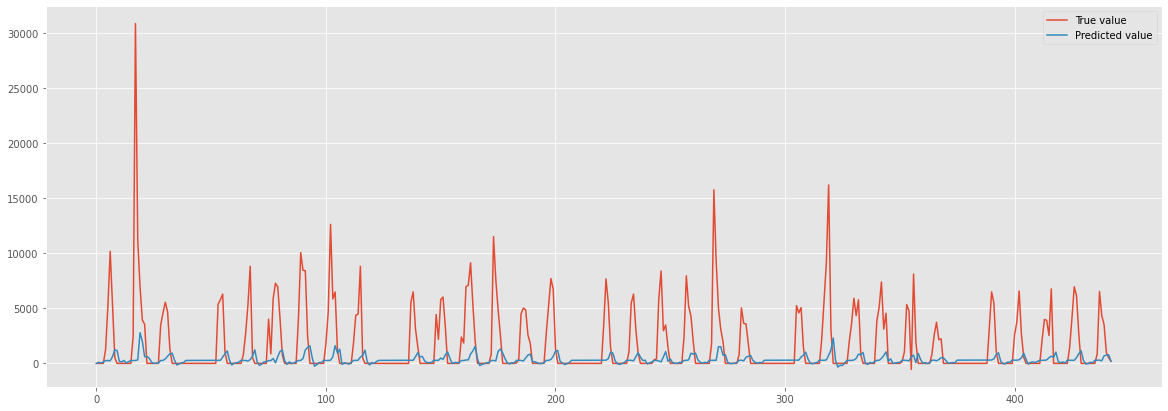

In [82]:
test_predict = model.predict(X_test_lstm)
plt.style.use('ggplot')
plt.figure(figsize=(20, 7))
plt.plot(y_test_lstm, label="True value")
plt.plot(test_predict.ravel(), label="Predicted value")
plt.legend()


## TimeBasedCV - lstm

In [83]:
# print('len df_train_lstm', len(df_train_lstm))
# for cv_i, (train_index, valid_index) in enumerate(tscv.split(df_train_lstm, date_column='InvoiceDate', verbose = 0)):
#   print(cv_i)
#   print(train_index, )
#   print(valid_index)
#   num_of_laggs = 14
#   X_train_cv, y_train_cv, num_of_features = prepareTheData(df_train_lstm.loc[train_index], num_laggs = num_of_laggs, Bool_Include_Country = True, Bool_Include_Date_Info = True)
#   print('len(X_train_cv)', len(X_train_cv))

#   X_valid_cv, y_valid_cv, num_of_features = prepareTheData(df_train_lstm.loc[valid_index], num_laggs = num_of_laggs, Bool_Include_Country = True, Bool_Include_Date_Info = True)
#   print('len X_valid_cv', len(X_valid_cv))

In [84]:
# # load the dataset from csv (safety ensurance)
# df_train_lstm = read_the_csv_file_from_data_folder('df_train_lstm')
# df_train_lstm_time = df_train_lstm[:]
# df_train_lstm_time['InvoiceDate'] = pd.to_datetime(df_train_lstm_time['InvoiceDate'])


# df_test_lstm = read_the_csv_file_from_data_folder('df_test_lstm')
# df_test_lstm_time = df_test_lstm[:]
# df_test_lstm_time['InvoiceDate'] = pd.to_datetime(df_test_lstm_time['InvoiceDate'])

# # remove time 
# df_train_lstm = df_train_lstm.drop(['InvoiceDate'], axis=1)
# df_test_lstm_time = df_test_lstm_time.drop(['InvoiceDate'], axis=1)




# # define parameters
# hpo_num_of_laggs = 14
# hpo_Bool_Include_Country = True
# hpo_Bool_Include_Date_Info = True
# hpo_epochs = 2
# hpo_lr = 0.0001
# scaling = True




# scores = []
# for cv_i, (train_index, valid_index) in enumerate(tscv.split(df_train_lstm_time, date_column='InvoiceDate', verbose = 0)):
#   print(cv_i)
  
#   df_train_lstm_cv_train = df_train_lstm.loc[train_index]
#   df_train_lstm_cv_valid = df_train_lstm.loc[valid_index]

  

#   # prepare the data
#   X_train_cv, y_train_cv, num_of_features = prepareTheData(df_train_lstm_cv_train, 
#                                                            num_laggs = hpo_num_of_laggs, 
#                                                            Bool_Include_Country = hpo_Bool_Include_Country, 
#                                                            Bool_Include_Date_Info = hpo_Bool_Include_Date_Info,
#                                                            verbose = 1,)
  
  



#   # print('len(X_train_cv)', len(X_train_cv))

#   X_valid_cv, y_valid_cv, num_of_features = prepareTheData(df_train_lstm_cv_valid, 
#                                                            num_laggs = hpo_num_of_laggs, 
#                                                            Bool_Include_Country = hpo_Bool_Include_Country, 
#                                                            Bool_Include_Date_Info = hpo_Bool_Include_Date_Info,
#                                                           #  scaler = True,
#                                                            verbose = 1)

#   # remove outleirs
#   # if scaling == True:
#   #   scaler = StandardScaler()
#   #   # df_train_lstm_cv_train = pd.DataFrame(scaler.fit_transform(df_train_lstm_cv_train),index=df_train_lstm_cv_train.index, columns=df_train_lstm_cv_train.columns)
#   #   # df_train_lstm_cv_valid = pd.DataFrame(scaler.transform(df_train_lstm_cv_valid),index=df_train_lstm_cv_valid.index, columns=df_train_lstm_cv_valid.columns)
#   #   X_train_cv = scaler.fit_transform(df_train_lstm_cv_train)
#   #   X_valid_cv = scaler.transform(X_valid_cv)
#    # ('select_best',  SelectFdr(alpha=0.05)), # does not work with the dataset
#     # ("pca", PCA(.99, random_state = 42)), # does not work with the dataset


#   # print('len X_valid_cv', len(X_valid_cv))

    

#   # if 
#   # select_best',  SelectFdr(alpha=0.05)), # does not work with the dataset
#     # ("pca", PCA(.99, random_state = 42)), # does not work with the dataset

#   model = None
#   model = create_model_valilla_lstm(hpo_num_of_laggs, num_of_features)
#   model.compile(optimizer=Adam(lr=hpo_lr), loss='mse')

#   model.fit(X_train_cv, y_train_cv, epochs=hpo_epochs)


  

#   # test cv
#   Y_valid_predict = model.predict(X_valid_cv)

#   # if scaler == True:
#   #   scaler.inverse_transform(scaled)


#   plt.style.use('ggplot')
#   plt.figure(figsize=(20, 7))
#   plt.plot(y_valid_cv, label="True value")
#   plt.plot(Y_valid_predict.ravel(), label="Predicted value")
#   plt.legend()
#   plt.show()

#   # accuracy for the current fold only    
#   RMSEscore = c_rmse(y_valid_cv, Y_valid_predict)

#   scores.append(RMSEscore)
#   print('RMSE: ', np.round(RMSEscore,3))




In [85]:
# average_r2score = np.mean(scores)
# print('Mean_r2score: ', np.round(average_r2score,3), 'Max_r2score:', np.round(max(scores),3), 'Min_r2score:', np.round(min(scores),3), 'SD_r2score:', np.round(np.std(scores),3))
# #### End of example ####

## HPO of vanilla lstm

In [86]:
#  df_train_lstm = read_the_csv_file_from_data_folder('df_train_lstm')
# df_train_lstm_time = df_train_lstm[:]
# df_train_lstm_time['InvoiceDate'] = pd.to_datetime(df_train_lstm_time['InvoiceDate'])


# df_test_lstm = read_the_csv_file_from_data_folder('df_test_lstm')
# df_test_lstm_time = df_test_lstm[:]
# df_test_lstm_time['InvoiceDate'] = pd.to_datetime(df_test_lstm_time['InvoiceDate'])

# # remove time 
# df_train_lstm = df_train_lstm.drop(['InvoiceDate'], axis=1)
# df_test_lstm_time = df_test_lstm_time.drop(['InvoiceDate'], axis=1)

# # Optuna sample
# hpo_num_of_laggs = 2
# hpo_Bool_Include_Country = True
# hpo_Bool_Include_Date_Info = True

# scaling = True

# num_L1_LSTMs=100
# num_L2_Dense=50


# hpo_epochs = 2
# hpo_lr = 0.001

# tscv = TimeBasedCV(train_period=147,
#                    test_period=17,
#                    freq='days')

# scores = []
# for cv_i, (train_index, valid_index) in enumerate(tscv.split(df_train_lstm_time, date_column='InvoiceDate', verbose = 0)):
#   print(cv_i)
  
#   df_train_lstm_cv_train = df_train_lstm.loc[train_index]
#   df_train_lstm_cv_valid = df_train_lstm.loc[valid_index]

  
#   if scaling == True:
#     scaler = StandardScaler()
#     df_train_lstm_cv_train = pd.DataFrame(scaler.fit_transform(df_train_lstm_cv_train),index=df_train_lstm_cv_train.index, columns=df_train_lstm_cv_train.columns)
#     df_train_lstm_cv_valid = pd.DataFrame(scaler.transform(df_train_lstm_cv_valid),index=df_train_lstm_cv_valid.index, columns=df_train_lstm_cv_valid.columns)


#   # prepare the data
#   X_train_cv, y_train_cv, num_of_features = prepareTheData(df_train_lstm_cv_train, 
#                                                           num_laggs = hpo_num_of_laggs, 
#                                                           Bool_Include_Country = hpo_Bool_Include_Country, 
#                                                           Bool_Include_Date_Info = hpo_Bool_Include_Date_Info,
#                                                           verbose = 0,)
  
  



#   # print('len(X_train_cv)', len(X_train_cv))

#   X_valid_cv, y_valid_cv, num_of_features = prepareTheData(df_train_lstm_cv_valid, 
#                                                           num_laggs = hpo_num_of_laggs, 
#                                                           Bool_Include_Country = hpo_Bool_Include_Country, 
#                                                           Bool_Include_Date_Info = hpo_Bool_Include_Date_Info,
#                                                           #  scaler = True,
#                                                           verbose = 0)

#   # remove outleirs
#   # if scaling == True:
#   #   scaler = StandardScaler()
#   #   # df_train_lstm_cv_train = pd.DataFrame(scaler.fit_transform(df_train_lstm_cv_train),index=df_train_lstm_cv_train.index, columns=df_train_lstm_cv_train.columns)
#   #   # df_train_lstm_cv_valid = pd.DataFrame(scaler.transform(df_train_lstm_cv_valid),index=df_train_lstm_cv_valid.index, columns=df_train_lstm_cv_valid.columns)
#   #   X_train_cv = scaler.fit_transform(df_train_lstm_cv_train)
#   #   X_valid_cv = scaler.transform(X_valid_cv)
#   # ('select_best',  SelectFdr(alpha=0.05)), # does not work with the dataset
#     # ("pca", PCA(.99, random_state = 42)), # does not work with the dataset


#   # print('len X_valid_cv', len(X_valid_cv))

    

#   # if 
#   # select_best',  SelectFdr(alpha=0.05)), # does not work with the dataset
#     # ("pca", PCA(.99, random_state = 42)), # does not work with the dataset

#   model = None
#   model = create_model_valilla_lstm(hpo_num_of_laggs, num_of_features)
#   model.compile(optimizer=Adam(lr=hpo_lr), loss='mse')

#   model.fit(X_train_cv, y_train_cv, epochs=hpo_epochs)


  

#   # test cv
#   Y_valid_predict = model.predict(X_valid_cv)

#   # if scaler == True:
#   #   scaler.inverse_transform(scaled)


#   plt.style.use('ggplot')
#   plt.figure(figsize=(20, 7))
#   plt.plot(y_valid_cv, label="True value")
#   plt.plot(Y_valid_predict.ravel(), label="Predicted value")
#   plt.legend()
#   plt.show()

#   RMSEscore = c_rmse(y_valid_cv, Y_valid_predict)

#   scores.append(RMSEscore)
#   print('RMSE: ', np.round(RMSEscore,3))

# average_RMSE = np.mean(scores)
# score_name = "RMSE"
# print('Mean_{}: '.format(score_name), np.round(np.mean(scores),3), 'Max_{}: '.format(score_name), np.round(max(scores),3), 'Min_{}: '.format(score_name), np.round(min(scores),3), 'SD_{}: '.format(score_name), np.round(np.std(scores),3))
# # return average_RMSE

# #   # accuracy for the current fold only    
# #   RMSEscore = c_mean_absolute_percentage_error(y_valid_cv, Y_valid_predict)

# #   scores.append(RMSEscore)
# #   print('RMSE: ', np.round(RMSEscore,3))

# #   # early stopping:
# #   trial.report(RMSEscore, cv_i)
# #   if trial.should_prune():
# #     raise optuna.TrialPruned()


# # average_RMSE = np.mean(scores)
# # score_name = "RMSE"
# # print('Mean_{}: '.format(score_name), np.round(np.mean(scores),3), 'Max_{}: '.format(score_name), np.round(max(scores),3), 'Min_{}: '.format(score_name), np.round(min(scores),3), 'SD_{}: '.format(score_name), np.round(np.std(scores),3))


# # accuracy for the current fold only    





### Optuna main function

In [87]:
# Optuna main function
def objective(trial):

  # clear previous run
  gc.collect()
  tf.keras.backend.clear_session()


  # load the dataset from csv (safety ensurance)
  df_train_lstm = read_the_csv_file_from_data_folder('df_train_lstm')
  df_train_lstm_time = df_train_lstm[:]
  df_train_lstm_time['InvoiceDate'] = pd.to_datetime(df_train_lstm_time['InvoiceDate'])


  df_test_lstm = read_the_csv_file_from_data_folder('df_test_lstm')
  df_test_lstm_time = df_test_lstm[:]
  df_test_lstm_time['InvoiceDate'] = pd.to_datetime(df_test_lstm_time['InvoiceDate'])

  # remove time 
  df_train_lstm = df_train_lstm.drop(['InvoiceDate'], axis=1)
  df_test_lstm= df_test_lstm.drop(['InvoiceDate'], axis=1)

  # Optuna hyperparameters
  hpo_num_of_laggs = trial.suggest_int("num_laggs", 1, 60)
  hpo_Bool_Include_Country = trial.suggest_categorical("data_include_country", [True, False])
  hpo_Bool_Include_Date_Info = trial.suggest_categorical("data_include_date_info", [True, False])

  hpo_remove_training_outlier = False
  hpo_feature_selection = False  
  hpo_pca = False
  
  hpo_num_L1_LSTMs = trial.suggest_int("L1_lstm_num", 10, 200)
  hpo_num_L2_Dense = trial.suggest_int("L2_dense_num", 10, 200)

  hpo_epochs = trial.suggest_int("num_epochs", 1, 50)
  hpo_lr = trial.suggest_float('lr', 0.00001, 0.1, log=True)

  print("\n---------\nTrial Number:", trial.number)

  print("Optuna HPO sample:\nhpo_num_of_laggs:",hpo_num_of_laggs,
        "\nhpo_Bool_Include_Country:",hpo_Bool_Include_Country,
        '\nhpo_Bool_Include_Date_Info:',hpo_Bool_Include_Date_Info,
        '\nhpo_num_L1_LSTMs:',hpo_num_L1_LSTMs,
        '\nhpo_hpo_num_L2_Dense:',hpo_num_L2_Dense,
        '\nhpo_epochs:',hpo_epochs,
        '\nhpo_lr:',hpo_lr,'\n' )
  

  # try:
  scores = []
  # tscv = TimeBasedCV(train_period=270,
  #                 test_period=30,
  #                 freq='days')
  tscv = TimeBasedCV(train_period=225,
                   test_period=25,
                   freq='days')

  try:
    for cv_i, (train_index, valid_index) in enumerate(tscv.split(df_train_lstm_time, date_column='InvoiceDate', verbose = 0)):
      print('cv_i:',cv_i)
      
      date_time_cv_i = datetime.datetime.now().strftime("%m_%d_%Y__%H_%M_%S")
      # save results into study_folder
      os.mkdir(os.path.join(study_folder,"Trial_"+str(trial.number)+"_cv_"+str(cv_i)+'_Model_'+date_time_cv_i))
      cv_i_folder = os.path.join(study_folder,"Trial_"+str(trial.number)+"_cv_"+str(cv_i)+'_Model_'+date_time_cv_i)
      
      df_train_lstm_cv_train = df_train_lstm.loc[train_index]
      df_train_lstm_cv_valid = df_train_lstm.loc[valid_index]



      # split dataframe into y, date and features
      # df_train_lstm_cv_train_X = df_train_lstm_cv_train.drop(['Sum_OrderQuantity'], axis = 1)
      # df_train_lstm_cv_train_y = df_train_lstm_cv_train[['Sum_OrderQuantity']]

      # df_train_lstm_cv_valid_X = df_train_lstm_cv_valid.drop(['Sum_OrderQuantity'], axis = 1)
      # df_train_lstm_cv_valid_y = df_train_lstm_cv_valid[['Sum_OrderQuantity']]

      # scaler_X = StandardScaler()
        # df_train_lstm_cv_valid_X = pd.DataFrame(scaler_X.fit_transform(df_train_lstm_cv_valid_X),index=df_train_lstm_cv_valid_X.index, columns=df_train_lstm_cv_valid_X.columns)
        # df_train_lstm_cv_valid_X = pd.DataFrame(scaler_X.transform(df_train_lstm_cv_valid_X),index=df_train_lstm_cv_valid_X.index, columns=df_train_lstm_cv_valid_X.columns)

        # scaler_y = StandardScaler()
        # df_train_lstm_cv_train_y = pd.DataFrame(scaler_X.fit_transform(df_train_lstm_cv_train_y),index=df_train_lstm_cv_train_y.index, columns=df_train_lstm_cv_train_y.columns)
        # df_train_lstm_cv_valid_y = pd.DataFrame(scaler_X.transform(df_train_lstm_cv_valid_y),index=df_train_lstm_cv_valid_y.index, columns=df_train_lstm_cv_valid_y.columns)

        # # pd.concat([test2,test1], axis=1)
      # df_train_lstm_cv_train = pd.concat([df_train_lstm_cv_valid_X,df_train_lstm_cv_train_y], axis=1)
      # df_train_lstm_cv_valid = pd.concat([df_train_lstm_cv_valid_X,df_train_lstm_cv_valid_y], axis=1)

      #Normalizer
      # if hpo_scaling == True:
        
      scaler = StandardScaler()
      df_train_lstm_cv_train = pd.DataFrame(scaler.fit_transform(df_train_lstm_cv_train),index=df_train_lstm_cv_train.index, columns=df_train_lstm_cv_train.columns)
      df_train_lstm_cv_valid = pd.DataFrame(scaler.transform(df_train_lstm_cv_valid),index=df_train_lstm_cv_valid.index, columns=df_train_lstm_cv_valid.columns)

      if hpo_pca == True:
        pass
        # PCA(.99, random_state = 42)
        # if hpo_feature_selection:
      #   pass
      # if hpo_pca == True:
      #   pass
      #   # PCA(.99, random_state = 42)



    
    
      # prepare the data
      X_train_cv, y_train_cv, num_of_features = prepareTheData(df_train_lstm_cv_train, 
                                                              num_laggs = hpo_num_of_laggs, 
                                                              Bool_Include_Country = hpo_Bool_Include_Country, 
                                                              Bool_Include_Date_Info = hpo_Bool_Include_Date_Info,
                                                              verbose = 0,)
      X_valid_cv, y_valid_cv, num_of_features = prepareTheData(df_train_lstm_cv_valid, 
                                                              num_laggs = hpo_num_of_laggs, 
                                                              Bool_Include_Country = hpo_Bool_Include_Country, 
                                                              Bool_Include_Date_Info = hpo_Bool_Include_Date_Info,
                                                              #  scaler = True,
                                                              verbose = 0)

      model = None
      model = create_model_valilla_lstm(hpo_num_of_laggs, num_of_features, num_L1_LSTMs=hpo_num_L1_LSTMs, num_L2_Dense=hpo_num_L2_Dense)
      model.compile(optimizer=Adam(lr=hpo_lr), loss='mse')


      mc = ModelCheckpoint(os.path.join(cv_i_folder,'best_model.h5'), monitor='val_loss', mode='min', save_best_only=True, verbose=1 )
      es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

      history = model.fit(X_train_cv, 
                y_train_cv,
                validation_data=(X_valid_cv, y_valid_cv),
                epochs=hpo_epochs,
                callbacks=[es,mc])


      # Make prediction
      # valid cv
      Y_valid_predict = model.predict(X_valid_cv)

      Y_valid_predict_transformed = invTransform(scaler, Y_valid_predict ,colName="target_OrderQuantity", colNames=df_train_lstm_cv_train.columns )
      y_valid_cv_transformed = invTransform(scaler, y_valid_cv ,colName="target_OrderQuantity", colNames=df_train_lstm_cv_train.columns )

      # valid data
      plt.style.use('ggplot')
      plt.figure(figsize=(20, 7))
      plt.plot(y_valid_cv_transformed, label="True value")
      plt.plot(Y_valid_predict_transformed.ravel(), label="Predicted value")
      plt.legend()
      plt.savefig(os.path.join(cv_i_folder,'Validation_And_ValidationPrediction.png'))
      plt.show()
      ## save
      plt.close()
      
      # plot training history
      plt.plot(history.history['loss'], label='train')
      plt.plot(history.history['val_loss'], label='test')
      axes = plt.axes()
      axes.set_ylim([0, 1])
      plt.legend()
      plt.savefig(os.path.join(cv_i_folder,'LossHistory.png'))
      plt.show()
      ## save
      plt.close()

      # Compute Scores
      score_rmse = c_rmse(y_valid_cv_transformed, Y_valid_predict_transformed)
      score_r2 = c_r2_score(y_valid_cv_transformed, Y_valid_predict_transformed)
      # score_mae = c_mean_absolute_error(y_valid_cv_transformed, Y_valid_predict_transformed)
      # score_mape = c_mean_absolute_percentage_error(y_valid_cv_transformed, Y_valid_predict_transformed)
      score_ess = c_explained_variance_score(y_valid_cv_transformed, Y_valid_predict_transformed)
      score_max_error = c_max_error(y_valid_cv_transformed, Y_valid_predict_transformed)
      scores.append(score_rmse)
      print('RMSE: ', np.round(score_rmse,3))

      # save json infos
      entry = {}
      entry['score_rmse'] = score_rmse
      entry['score_r2'] = score_r2
      # entry['score_mae'] = score_mae
      # entry['score_mape'] = score_mape
      entry['score_ess'] = score_ess
      entry['score_max_error'] = score_max_error

      # save json hpo
      entry['hpo_num_of_laggs'] = hpo_num_of_laggs
      entry['hpo_Bool_Include_Country'] = hpo_Bool_Include_Country
      entry['hpo_Bool_Include_Date_Info'] = hpo_Bool_Include_Date_Info
      entry['hpo_remove_training_outlier'] = hpo_remove_training_outlier
      entry['hpo_feature_selection'] = hpo_feature_selection
      entry['hpo_pca'] = hpo_pca
      entry['hpo_num_L1_LSTMs'] = hpo_num_L1_LSTMs
      entry['hpo_num_L2_Dense'] = hpo_num_L2_Dense
      entry['hpo_epochs'] = hpo_epochs
      entry['hpo_lr'] = hpo_lr

      with open(os.path.join(cv_i_folder,'MetaData.json'), 'w') as f:
        json.dump(entry, f)
      
      # save other infos
      entry_pkl = {}
      entry_pkl['model_summary'] = model.summary()

      f = open(os.path.join(cv_i_folder,'MetaData.pkl'),'wb')
      pickle.dump(entry_pkl,f)
      f.close()

      
      f1 = open(os.path.join(cv_i_folder,'scaler.pkl'),'wb')
      pickle.dump(scaler,f1)
      f1.close()


    print("\nOptuna_run: ",trial.number, "\nRMSE_avg:",np.round(np.mean(scores),6),'\n')
    
    ## train a model on the whole training data

    # compute testing score


    return np.round(np.mean(scores),6)

  except:
    pass

## HPO Random search

In [88]:
#@title Options: Vanilla LSTM Random search
Start_Optuna_Train_Vanilla_LSTM = False #@param ["False", "True"] {type:"raw"}
Create_New_Optuna_Study = False #@param ["False", "True"] {type:"raw"}
Optuna_batch_number = 253 #@param {type:"slider", min:1, max:500, step:1}

In [89]:
folder_OR2_models_vanilla_lstm = os.path.join(folder_OR2_models,'complex_Models_vanilla_lstm')
if Create_New_Optuna_Study:
  print('create new study in:')
  date_time_hpo_start = datetime.datetime.now().strftime("%m_%d_%Y__%H_%M_%S")
  os.mkdir(os.path.join(folder_OR2_models_vanilla_lstm,'Optuna_Study_'+date_time_hpo_start))
  study_folder = os.path.join(folder_OR2_models_vanilla_lstm,'Optuna_Study_'+date_time_hpo_start)
  print(study_folder)

  # Optuna study
   # 3. Create a study object and optimize the objective function.
  study = optuna.create_study(direction="minimize",sampler=optuna.samplers.RandomSampler())

else:
  print('load_latest_study from:')
  study_folder = returnLatestFolder(folder_OR2_models_vanilla_lstm, aprefix ="Optuna_Study_")
  print(study_folder)

  read_path_study = os.path.join(study_folder,'study.pkl')
  g = open(read_path_study,'rb')
  study = pickle.load(g)
  g.close()



load_latest_study from:
drive/MyDrive/Industrial_Applications_of_AI/Secondary_Sector/Online_Retail_II/models/complex_Models_vanilla_lstm/Optuna_Study_04_20_2022__21_17_08


### Start the training

In [90]:
if Start_Optuna_Train_Vanilla_LSTM:
  for optuna_batch in range(Optuna_batch_number):
    print("\n------------------\nOptuna Batch:",optuna_batch)

    # save study every Optuna_trials_per_batch runs
    study.optimize(objective, n_trials=1)

    # save the study
    save_path_study = os.path.join(study_folder,'study.pkl')
    print("save the study in:", save_path_study)
    f = open(save_path_study,'wb')
    pickle.dump(study,f)
    f.close()

    if optuna_batch % 5 == 0:
      # show intermediate results
      Optuna_show_results(study)
      Optuna_plot_all(study)

In [91]:
Optuna_show_results(study)

'len(study.trials'

5

'study.best_value'

17.886141

'study.best_trial'

FrozenTrial(number=4, values=[17.886141], datetime_start=datetime.datetime(2022, 4, 20, 21, 26, 49, 399809), datetime_complete=datetime.datetime(2022, 4, 20, 21, 28, 32, 724147), params={'num_laggs': 28, 'data_include_country': True, 'data_include_data_info': True, 'L1_lstm_num': 146, 'L2_dense_num': 47, 'num_epochs': 28, 'lr': 0.007866004945833708}, distributions={'num_laggs': IntUniformDistribution(high=30, low=1, step=1), 'data_include_country': CategoricalDistribution(choices=(True, False)), 'data_include_data_info': CategoricalDistribution(choices=(True, False)), 'L1_lstm_num': IntUniformDistribution(high=200, low=10, step=1), 'L2_dense_num': IntUniformDistribution(high=200, low=10, step=1), 'num_epochs': IntUniformDistribution(high=30, low=1, step=1), 'lr': LogUniformDistribution(high=0.1, low=1e-05)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=4, state=TrialState.COMPLETE, value=None)

'study.best_params'

{'L1_lstm_num': 146,
 'L2_dense_num': 47,
 'data_include_country': True,
 'data_include_data_info': True,
 'lr': 0.007866004945833708,
 'num_epochs': 28,
 'num_laggs': 28}

'study.trials'

[FrozenTrial(number=0, values=None, datetime_start=datetime.datetime(2022, 4, 20, 21, 17, 21, 298111), datetime_complete=datetime.datetime(2022, 4, 20, 21, 17, 21, 391799), params={'num_laggs': 10, 'data_include_country': False, 'data_include_data_info': False, 'L1_lstm_num': 138, 'L2_dense_num': 135, 'num_epochs': 19, 'lr': 0.0022475130591956788}, distributions={'num_laggs': IntUniformDistribution(high=30, low=1, step=1), 'data_include_country': CategoricalDistribution(choices=(True, False)), 'data_include_data_info': CategoricalDistribution(choices=(True, False)), 'L1_lstm_num': IntUniformDistribution(high=200, low=10, step=1), 'L2_dense_num': IntUniformDistribution(high=200, low=10, step=1), 'num_epochs': IntUniformDistribution(high=30, low=1, step=1), 'lr': LogUniformDistribution(high=0.1, low=1e-05)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=0, state=TrialState.FAIL, value=None),
 FrozenTrial(number=1, values=None, datetime_start=datetime.datetime(2022, 4, 

In [92]:
Optuna_plot_all(study)

[W 2022-05-19 10:44:16,276] You need to set up the pruning feature to utilize `plot_intermediate_values()`


[W 2022-05-19 10:44:16,903] Param L1_lstm_num unique value length is less than 2.
[W 2022-05-19 10:44:16,915] Param L1_lstm_num unique value length is less than 2.
[W 2022-05-19 10:44:16,927] Param L1_lstm_num unique value length is less than 2.
[W 2022-05-19 10:44:16,936] Param L1_lstm_num unique value length is less than 2.
[W 2022-05-19 10:44:16,952] Param L1_lstm_num unique value length is less than 2.
[W 2022-05-19 10:44:16,960] Param L1_lstm_num unique value length is less than 2.
[W 2022-05-19 10:44:16,974] Param L2_dense_num unique value length is less than 2.
[W 2022-05-19 10:44:16,983] Param L2_dense_num unique value length is less than 2.
[W 2022-05-19 10:44:16,991] Param L2_dense_num unique value length is less than 2.
[W 2022-05-19 10:44:17,002] Param L2_dense_num unique value length is less than 2.
[W 2022-05-19 10:44:17,010] Param L2_dense_num unique value length is less than 2.
[W 2022-05-19 10:44:17,016] Param L2_dense_num unique value length is less than 2.
[W 2022-05

## HPO TPE 

In [93]:
#@title Options: Vanilla LSTM TPE
Start_Optuna_Train_Vanilla_LSTM_TPE = False #@param ["False", "True"] {type:"raw"}
Create_New_Optuna_Study_TPE = False #@param ["False", "True"] {type:"raw"}
Optuna_runs = 253 #@param {type:"slider", min:1, max:500, step:1}

In [94]:
folder_OR2_models_vanilla_lstm_TPE = os.path.join(folder_OR2_models,'complex_Models_vanilla_lstm_TPE')
if Create_New_Optuna_Study_TPE:
  print('create new study in:')
  date_time_hpo_start = datetime.datetime.now().strftime("%m_%d_%Y__%H_%M_%S")
  os.mkdir(os.path.join(folder_OR2_models_vanilla_lstm_TPE,'Optuna_Study_'+date_time_hpo_start))
  study_folder = os.path.join(folder_OR2_models_vanilla_lstm_TPE,'Optuna_Study_'+date_time_hpo_start)
  print(study_folder)

  # Optuna study
   # 3. Create a study object and optimize the objective function.
   # Tipps and Tricks:
   # https://www.jeffchiou.com/blog/hyperparameter-optimization-optuna/#introduction

  # Initiate with values
  # study.enqueue_trial({"max_depth": 10,
  #                    "n_estimators": 100,
  #                    "min_samples_leaf": 1,
  #                    "min_samples_split": 2,}) 


  # create Study
  study = optuna.create_study(
      sampler=optuna.samplers.TPESampler(multivariate=True),
      direction='minimize',
      pruner=optuna.pruners.MedianPruner(),)
# succesive holding (Hyperband)
# As SuccessiveHalving (SHA) requires the number of configurations  as its hyperparameter. For a given finite budget , all the configurations have the resources of 
#  on average. As you can see, there will be a trade-off of  and 
# . Hyperband attacks this trade-off by trying different  values for a fixed budget.
# https://optuna.readthedocs.io/en/latest/reference/generated/optuna.pruners.HyperbandPruner.html

else:
  print('load_latest_study from:')
  study_folder = returnLatestFolder(folder_OR2_models_vanilla_lstm_TPE, aprefix ="Optuna_Study_")
  print(study_folder)

  read_path_study = os.path.join(study_folder,'study.pkl')
  g = open(read_path_study,'rb')
  study = pickle.load(g)
  g.close()



load_latest_study from:
drive/MyDrive/Industrial_Applications_of_AI/Secondary_Sector/Online_Retail_II/models/complex_Models_vanilla_lstm_TPE/Optuna_Study_04_22_2022__15_01_40


### Start the training

In [95]:
if Start_Optuna_Train_Vanilla_LSTM_TPE:
  for Optuna_run in range(Optuna_runs):
    print("\n------------------\nOptuna Batch:",Optuna_run)

    # save study every Optuna_trials_per_batch runs
    study.optimize(objective, n_trials = 1)

    # save the study
    save_path_study = os.path.join(study_folder,'study.pkl')
    print("save the study in:", save_path_study)
    f = open(save_path_study,'wb')
    pickle.dump(study,f)
    f.close()

    if Optuna_run % 5 == 0:
      # show intermediate results
      try:
        Optuna_show_results(study)
        Optuna_plot_all(study)
      except:
        pass


In [96]:
Optuna_show_results(study)

'len(study.trials'

120

'study.best_value'

27.703286

'study.best_trial'

FrozenTrial(number=23, values=[27.703286], datetime_start=datetime.datetime(2022, 4, 22, 18, 3, 15, 32909), datetime_complete=datetime.datetime(2022, 4, 22, 18, 10, 1, 841324), params={'num_laggs': 21, 'data_include_country': False, 'data_include_date_info': True, 'L1_lstm_num': 198, 'L2_dense_num': 183, 'num_epochs': 16, 'lr': 0.0005824466869046893}, distributions={'num_laggs': IntUniformDistribution(high=60, low=1, step=1), 'data_include_country': CategoricalDistribution(choices=(True, False)), 'data_include_date_info': CategoricalDistribution(choices=(True, False)), 'L1_lstm_num': IntUniformDistribution(high=200, low=10, step=1), 'L2_dense_num': IntUniformDistribution(high=200, low=10, step=1), 'num_epochs': IntUniformDistribution(high=50, low=1, step=1), 'lr': LogUniformDistribution(high=0.1, low=1e-05)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=23, state=TrialState.COMPLETE, value=None)

'study.best_params'

{'L1_lstm_num': 198,
 'L2_dense_num': 183,
 'data_include_country': False,
 'data_include_date_info': True,
 'lr': 0.0005824466869046893,
 'num_epochs': 16,
 'num_laggs': 21}

'study.trials'

[FrozenTrial(number=0, values=[59.951719], datetime_start=datetime.datetime(2022, 4, 22, 15, 1, 40, 541837), datetime_complete=datetime.datetime(2022, 4, 22, 15, 3, 35, 941825), params={'num_laggs': 17, 'data_include_country': True, 'data_include_date_info': True, 'L1_lstm_num': 75, 'L2_dense_num': 177, 'num_epochs': 15, 'lr': 7.308029736310842e-05}, distributions={'num_laggs': IntUniformDistribution(high=60, low=1, step=1), 'data_include_country': CategoricalDistribution(choices=(True, False)), 'data_include_date_info': CategoricalDistribution(choices=(True, False)), 'L1_lstm_num': IntUniformDistribution(high=200, low=10, step=1), 'L2_dense_num': IntUniformDistribution(high=200, low=10, step=1), 'num_epochs': IntUniformDistribution(high=50, low=1, step=1), 'lr': LogUniformDistribution(high=0.1, low=1e-05)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=0, state=TrialState.COMPLETE, value=None),
 FrozenTrial(number=1, values=[50.188754], datetime_start=datetime.datet

In [97]:
Optuna_plot_all(study)

[W 2022-05-19 10:44:17,678] You need to set up the pruning feature to utilize `plot_intermediate_values()`


In [98]:
study.trials_dataframe().sort_values('value')

,number,value,datetime_start,datetime_complete,duration,params_L1_lstm_num,params_L2_dense_num,params_data_include_country,params_data_include_date_info,params_lr,params_num_epochs,params_num_laggs,state
23,23,27.703286,2022-04-22 18:03:15.032909,2022-04-22 18:10:01.841324,0 days 00:06:46.808415,198.0,183.0,False,True,0.000582,16.0,21.0,COMPLETE
81,81,27.830842,2022-04-24 11:52:01.476425,2022-04-24 11:57:25.579066,0 days 00:05:24.102641,131.0,44.0,False,True,0.002256,11.0,42.0,COMPLETE
79,79,28.027746,2022-04-24 11:40:17.187439,2022-04-24 11:46:19.563803,0 days 00:06:02.376364,192.0,165.0,False,True,0.000902,18.0,30.0,COMPLETE
69,69,28.110672,2022-04-23 00:54:59.223638,2022-04-23 01:04:55.633170,0 days 00:09:56.409532,177.0,144.0,False,True,0.000602,20.0,27.0,COMPLETE
74,74,28.166029,2022-04-23 02:04:07.419721,2022-04-23 02:13:41.624605,0 days 00:09:34.204884,192.0,118.0,False,True,0.000962,13.0,40.0,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,115,NaN,2022-05-19 10:37:25.466637,2022-05-19 10:37:26.243192,0 days 00:00:00.776555,125.0,52.0,False,True,0.002420,11.0,35.0,FAIL
116,116,NaN,2022-05-19 10:37:26.255348,2022-05-19 10:37:26.606094,0 days 00:00:00.350746,163.0,17.0,False,True,0.000337,20.0,24.0,FAIL
117,117,NaN,2022-05-19 10:37:27.973908,2022-05-19 10:37:29.240461,0 days 00:00:01.266553,67.0,184.0,False,False,0.000044,7.0,11.0,FAIL
118,118,NaN,2022-05-19 10:37:29.254966,2022-05-19 10:37:30.937041,0 days 00:00:01.682075,177.0,61.0,False,True,0.020864,18.0,41.0,FAIL


# SARIMA

https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/

In [99]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [100]:
# Trend Elements
# p: Trend autoregression order.
# d: Trend difference order.
# q: Trend moving average order.

# Seasonal Elements
# P: Seasonal autoregressive order.
# D: Seasonal difference order.
# Q: Seasonal moving average order.
# m: The number of time steps for a single seasonal period.

In [101]:
# my_order = (1, 1, 1)
# my_order = (0, 0, 0)
# my_seasonal_order = (1, 1, 1, 2)

# model_arima = SARIMAX(y_train, order=my_order, seasonal_order=my_seasonal_order)

In [102]:
# additional models
### MLP
### Stacked LSTM
### Bidirectional LSTM
### CNN LSTM
### LSTM-CNN
### ConvLSTM
### LSTM Autoencoder